In [ ]:
import os

In [ ]:
pip install pycaret

In [ ]:
import numpy as np
import pandas as pd
from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
global_fig_settings = {
    "width": 1000,
    "height": 600,
}

In [ ]:
data = get_data("airline")

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [ ]:
eda = TSForecastingExperiment()


In [ ]:
eda.setup(data, fh = 12, fold = 3)

,Description,Value
0,session_id,3259
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


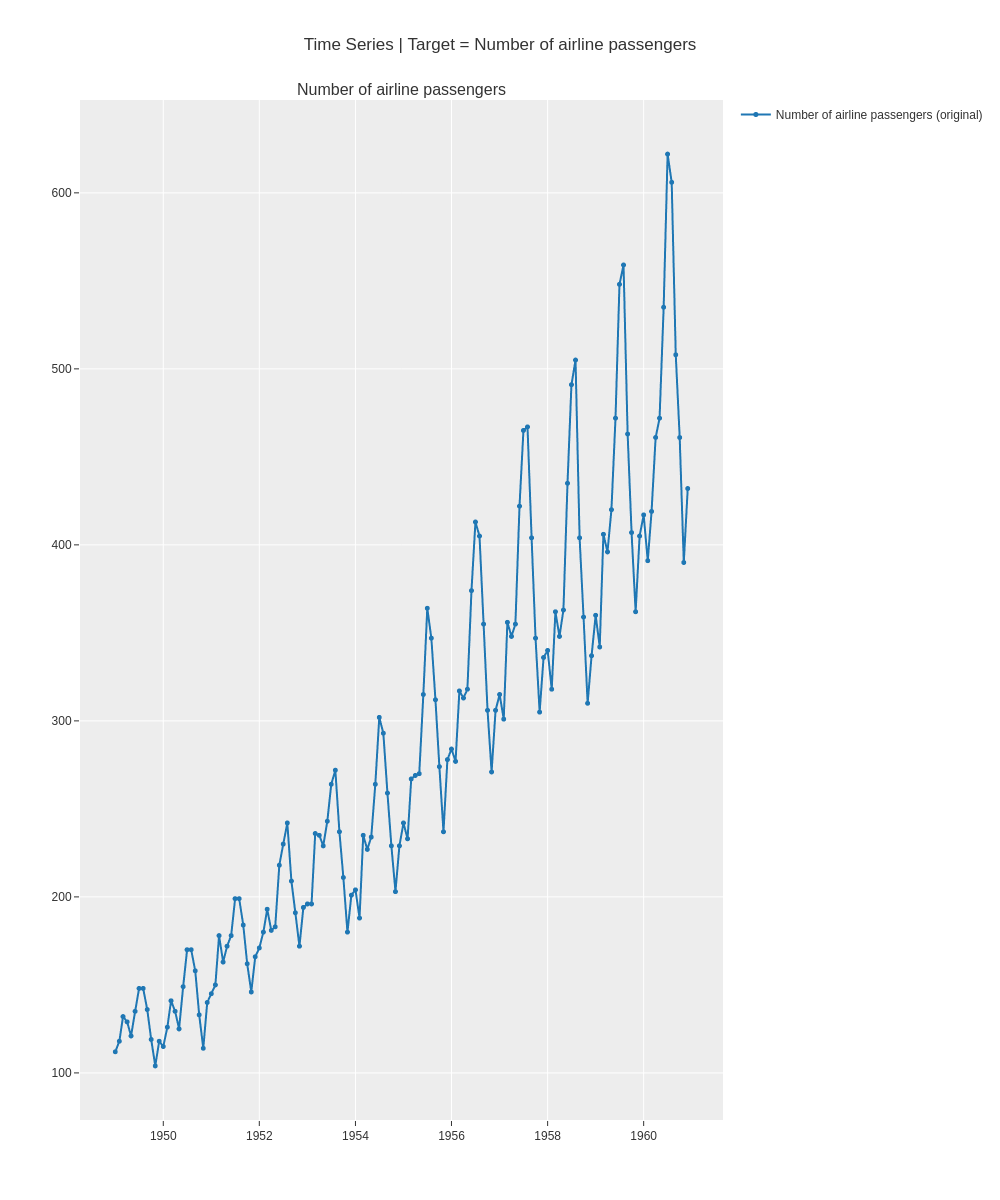

In [ ]:
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"height": 1000, "width": 1500})

In [ ]:
data = get_data("airline")

# Limiting the data for demonstration purposes.
data = data.iloc[-720:]

target = "CO(GT)"

exclude = ['NMHC(GT)', 'AH']
data.drop(columns=exclude, inplace=True)
data.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [ ]:
data_uni = data.copy()

exp_uni = TSForecastingExperiment()
exp_uni.setup(
    data=data_uni, fh=12,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=global_fig_settings, session_id=42
)

,Description,Value
0,session_id,42
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = exp_uni.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.5029,0.5521,14.6866,18.0731,0.0385,0.0386,0.8937
1,1957-12,0.5556,0.5910,16.9869,20.0627,0.0451,0.0444,0.8946
2,1958-12,1.0168,1.0024,29.0535,32.5856,0.0654,0.0679,0.7624
Mean,NaT,0.6918,0.7152,20.2424,23.5738,0.0497,0.0503,0.8502
SD,NaT,0.2308,0.2037,6.3008,6.4239,0.0114,0.0127,0.0621


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_uni.plot_model(model)

In [ ]:
exp_exo = TSForecastingExperiment()
exp_exo.setup(
    data=data, fh=12,
    fig_kwargs=global_fig_settings, session_id=42
)

,Description,Value
0,session_id,42
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model_exo = exp_exo.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.5029,0.5521,14.6866,18.0731,0.0385,0.0386,0.8937
1,1957-12,0.5556,0.5910,16.9869,20.0627,0.0451,0.0444,0.8946
2,1958-12,1.0168,1.0024,29.0535,32.5856,0.0654,0.0679,0.7624
Mean,NaT,0.6918,0.7152,20.2424,23.5738,0.0497,0.0503,0.8502
SD,NaT,0.2308,0.2037,6.3008,6.4239,0.0114,0.0127,0.0621


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_exo.plot_model(model_exo)


In [ ]:
final_model_exo = exp_exo.finalize_model(model_exo)